# Please note:
If you encounter any issues related to file paths, make sure to open the file located at the following path:
`/Users/fd/gitlocal/bootcamp_mingjia_jin/project/notebooks` — the file name should match.

All data files and Python functions can be found under the corresponding `/data` and `/src` folders within:
`/Users/fd/gitlocal/bootcamp_mingjia_jin/project`.

# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [1]:
import pandas as pd
import numpy as np

# Example synthetic data (replace with your project dataset)
np.random.seed(0)
n = 100
df = pd.DataFrame({
    'income': np.random.normal(60000, 15000, n).astype(int),
    'monthly_spend': np.random.normal(2000, 600, n).astype(int),
    'credit_score': np.random.normal(680, 50, n).astype(int)
})
df.head()

,income,monthly_spend,credit_score
0,86460,3129,661
1,66002,1191,668
2,74681,1237,734
3,93613,2581,712
4,88013,1296,712


## EDA(Preparation for the Next Step)

### 1. Variable distributions (for income, monthly_spend, credit_score):

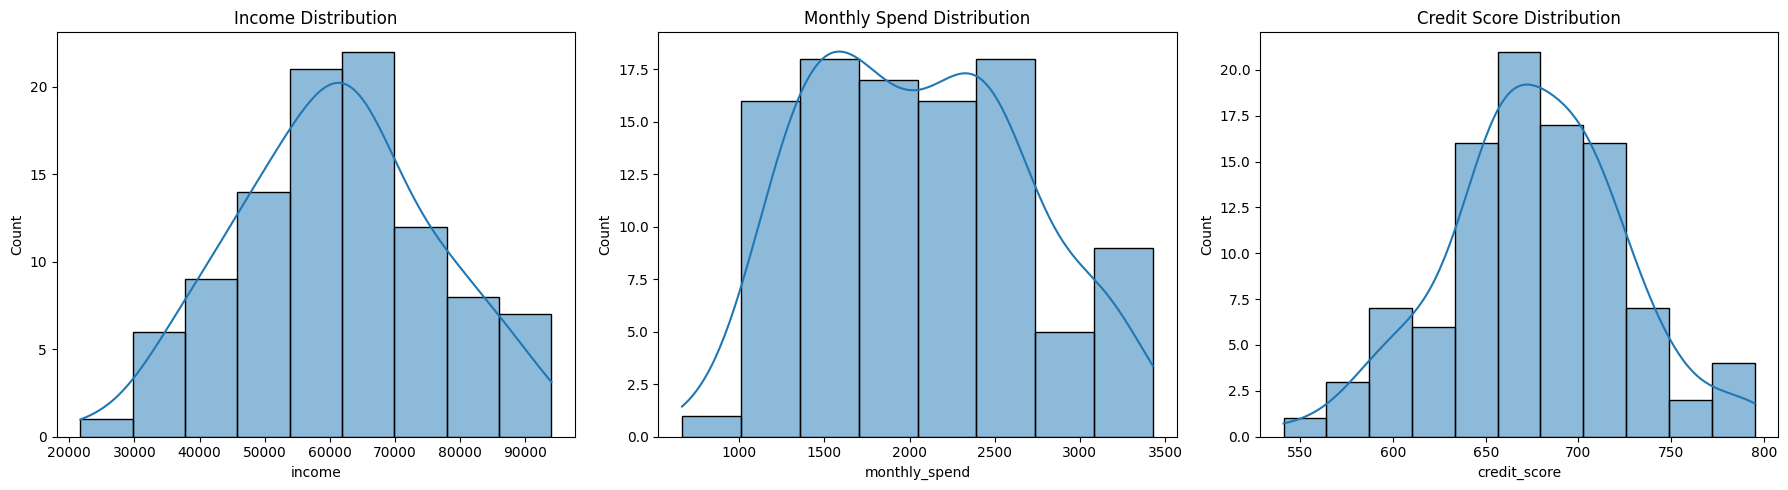

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['income'], kde=True, ax=ax[0])
ax[0].set_title('Income Distribution')

sns.histplot(df['monthly_spend'], kde=True, ax=ax[1])
ax[1].set_title('Monthly Spend Distribution')

sns.histplot(df['credit_score'], kde=True, ax=ax[2])
ax[2].set_title('Credit Score Distribution')

plt.tight_layout()
plt.show()

### 2. Correlation matrix (to justify numerical relationships):

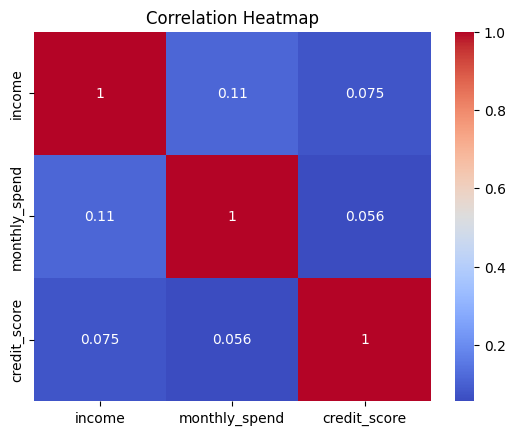

In [4]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## TODO: Implement at least 2 engineered features here

In [ ]:
# Example template:
df['spend_income_ratio'] = df['monthly_spend'] / df['income']  # TODO: Your feature
# Add rationale in markdown below

### Rationale for Feature 1 residual_credit_score
Explain why this feature may help a model. Reference your EDA.

The `residual_credit_score` measures how far an individual's actual credit score deviates from what would be expected based on their income.

According to our EDA, income and credit score are only weakly correlated (correlation ≈ 0.075), meaning that income alone does not explain credit behavior well.  
By modeling the expected credit score given income (via a simple linear regression), we can capture the residuals as a proxy for **credit outperformance or underperformance**.

This feature may help identify individuals who have unusually high (or low) credit scores compared to peers at similar income levels, which may reveal hidden behavioral traits valuable for prediction.

In [8]:
from sklearn.linear_model import LinearRegression

# Step 1: Fit linear model (credit_score ~ income)
model = LinearRegression()
X = df[['income']]
y = df['credit_score']
model.fit(X, y)

# Step 2: Predict credit score based on income
df['expected_credit_score'] = model.predict(X)

# Step 3: Calculate residual: actual - expected
df['residual_credit_score'] = df['credit_score'] - df['expected_credit_score']

df

,income,monthly_spend,credit_score,spend_adjusted_score,expected_credit_score,residual_credit_score
0,86460,3129,661,0.211182,682.611354,-21.611354
1,66002,1191,668,0.560403,677.760535,-9.760535
2,74681,1237,734,0.592892,679.818422,54.181578
3,93613,2581,712,0.275755,684.307409,27.692591
4,88013,1296,712,0.548959,682.979587,29.020413
...,...,...,...,...,...,...
95,70598,1897,736,0.387777,678.850298,57.149702
96,60157,2463,684,0.277597,676.374621,7.625379
97,86788,2494,709,0.284168,682.689126,26.310874
98,61903,3297,660,0.200121,676.788617,-16.788617


### Rationale for Feature 2 Spend-Adjusted Credit Score
Explain why this feature may help a model. Reference your EDA.

The `spend_adjusted_score` adjusts a person’s credit score by taking their monthly spending into account.  
This feature aims to differentiate between individuals with similar credit scores but different spending behaviors.

According to the EDA, `credit_score` is also normally distributed, but the correlation heatmap shows it is only weakly related to `monthly_spend` (correlation = 0.056).  
This suggests that credit scores alone do not explain actual spending behavior.  
By normalizing credit score with spending, we can highlight people who maintain a high score while spending less — potentially indicating more stable financial habits — and contrast them with high scorers who overspend.

In [9]:
df['spend_adjusted_score'] = df['credit_score'] / (df['monthly_spend'] + 1)
df

,income,monthly_spend,credit_score,spend_adjusted_score,expected_credit_score,residual_credit_score
0,86460,3129,661,0.211182,682.611354,-21.611354
1,66002,1191,668,0.560403,677.760535,-9.760535
2,74681,1237,734,0.592892,679.818422,54.181578
3,93613,2581,712,0.275755,684.307409,27.692591
4,88013,1296,712,0.548959,682.979587,29.020413
...,...,...,...,...,...,...
95,70598,1897,736,0.387777,678.850298,57.149702
96,60157,2463,684,0.277597,676.374621,7.625379
97,86788,2494,709,0.284168,682.689126,26.310874
98,61903,3297,660,0.200121,676.788617,-16.788617
